# To Train a new deep learning model to identify various people in the ICU Room

In [1]:
import os
HOME = os.getcwd()
print(HOME)

/Users/hemant./Intel_Final/Statement 1. 


# Installing and Checking Ultralytics

We  install the Ultralytics library and perform some initial checks.

In [2]:
!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.46 🚀 Python-3.11.5 torch-2.3.0 CPU (Apple M1)
Setup complete ✅ (8 CPUs, 8.0 GB RAM, 146.7/460.4 GB disk)


This Python script is setting up for object detection and image display. Here's a brief rundown:

- `from ultralytics import YOLO`: This line imports the `YOLO` class from the `ultralytics` library. `YOLO` is a popular object detection model.
- `from IPython.display import display, Image`: This line imports the `display` and `Image` functions from the `IPython.display` module. These functions are used to display Python objects in rich formats, including images, in Jupyter notebooks.

In [3]:
from ultralytics import YOLO

from IPython.display import display, Image

In [4]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

[Errno 2] No such file or directory: '/Users/hemant./Intel_Final/Statement 1.'
/Users/hemant./Intel_Final/Statement 1. 


Ultralytics YOLOv8.2.46 🚀 Python-3.11.5 torch-2.3.0 CPU (Apple M1)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg
image 1/1 /Users/hemant./Intel_Final/Statement 1. /dog.jpeg: 640x384 1 person, 1 car, 1 dog, 65.4ms
Speed: 1.6ms preprocess, 65.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/detect/predict9
💡 Learn more at https://docs.ultralytics.com/modes/predict


# Detection Result

We  run our YOLO model on an image, and now it's time to see the result! 

This Python script is used to change the current working directory and display an image with object detections. Here's a brief rundown:

- `%cd {HOME}`: This line changes the current working directory to the directory stored in the `HOME` variable.
- `Image(filename='runs/detect/predict/dog.jpeg', height=600)`: This line creates an `Image` object with the specified filename and height, and displays it. The image file is expected to be in the `runs/detect/predict` directory and is named `dog.jpeg`.

[Errno 2] No such file or directory: '/Users/hemant./Intel_Final/Statement 1.'
/Users/hemant./Intel_Final/Statement 1. 


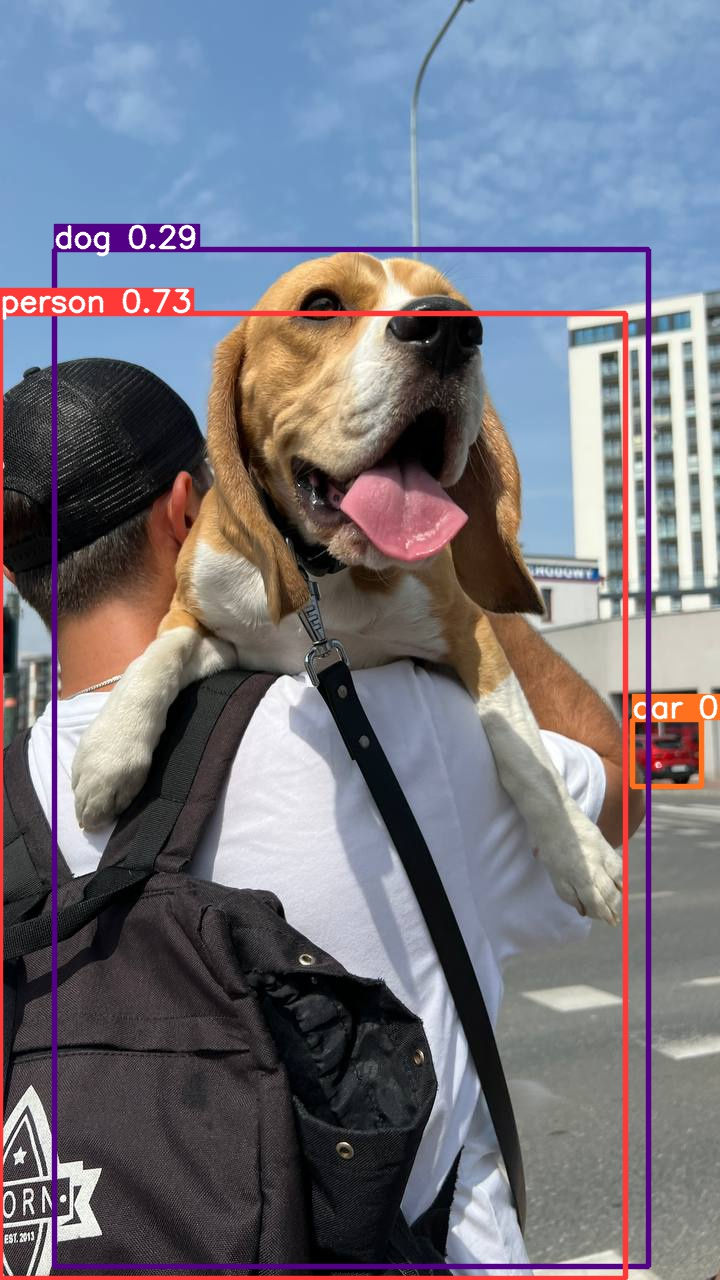

In [5]:
%cd {HOME}
Image(filename='runs/detect/predict/dog.jpeg', height=600)

In [6]:
model = YOLO(f'{HOME}/yolov8n.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)


Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg
image 1/1 /Users/hemant./Intel_Final/Statement 1. /dog.jpeg: 640x384 1 person, 1 car, 1 dog, 75.4ms
Speed: 1.9ms preprocess, 75.4ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 384)


This Python script is used to inspect the bounding boxes in the detection results. Here's a brief rundown:

- `results[0].boxes.xyxy`: This line accesses the coordinates of the bounding box for the first detection in the results. The coordinates are in the format `(x1, y1, x2, y2)`, where `(x1, y1)` is the top-left corner and `(x2, y2)` is the bottom-right corner of the box.
- `results[0].boxes.conf`: This line accesses the confidence score of the bounding box for the first detection in the results. The confidence score indicates how confident the model is that the detected object is of the predicted class.
- `results[0].boxes.cls`: This line accesses the class label of the bounding box for the first detection in the results. The class label indicates the type of object detected.

In [7]:
results[0].boxes.xyxy
results[0].boxes.conf
results[0].boxes.cls

tensor([ 0., 16.,  2.])

# Training:  YOLO 

This Python script is used to train the YOLO model on a dataset. Here's a brief rundown:

- `!yolo task=detect mode=train model=yolov8s.pt data="/Users/hemant./Intel_Final/Statement 1. /ICU.v1i.yolov8/data.yaml" epochs=30 imgsz=224 plots=True save=True`: This line runs the YOLO model in training mode. The model is specified as `yolov8s.pt`, the dataset is specified by a YAML file, the number of training epochs is set to 30, the image size is set to 224, plots are enabled, and the output is saved.

In [9]:
!yolo task=detect mode=train model=yolov8s.pt data="/Users/hemant./Intel_Final/Statement 1. /ICU.v1i.yolov8/data.yaml" epochs=100 imgsz=224 plots=True save=True

Ultralytics YOLOv8.2.46 🚀 Python-3.11.5 torch-2.3.0 CPU (Apple M1)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/Users/hemant./Intel_Final/Statement 1. /ICU.v1i.yolov8/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, s

#  Confusion Matrix

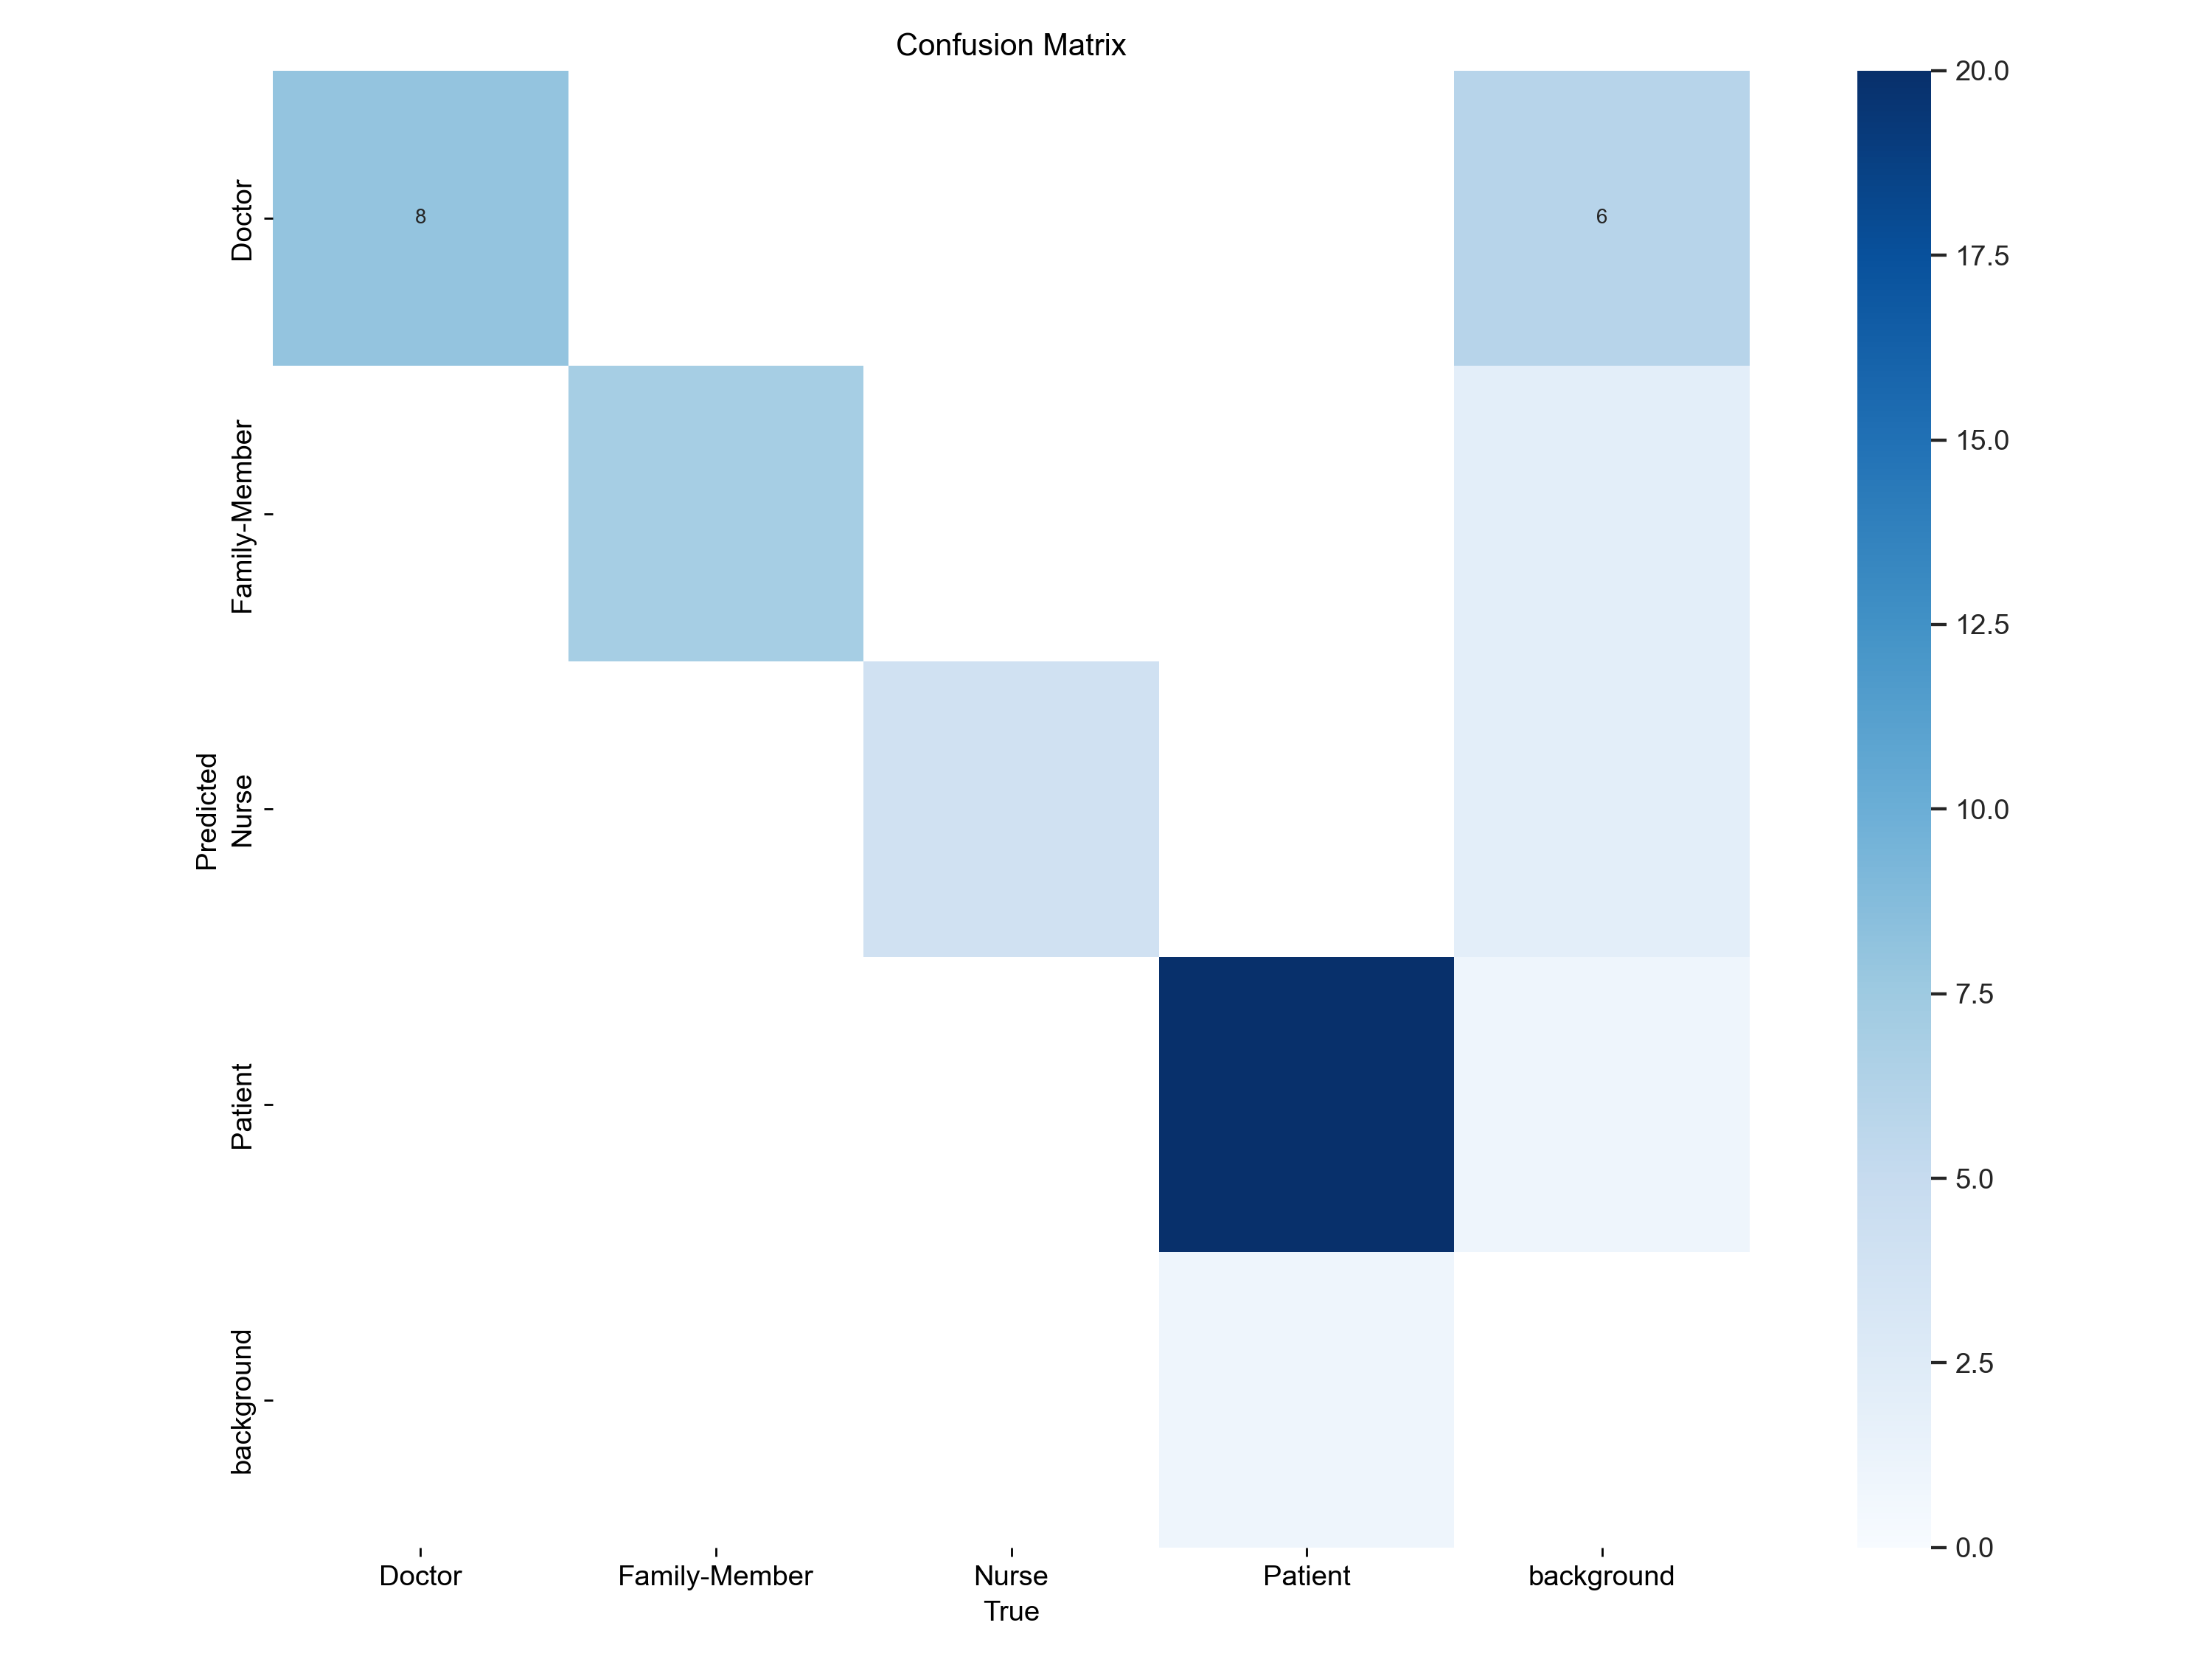

In [10]:
Image(filename='/Users/hemant./Intel_Final/Statement 1. /runs/detect/train4/confusion_matrix.png', width=600)

# Model to Test: Validation

In [11]:
!yolo task=detect mode=val model="/Users/hemant./Intel_Final/Statement 1. /runs/detect/train4/weights/best.pt" data="/Users/hemant./Intel_Final/Statement 1. /ICU.v1i.yolov8/data.yaml"


Ultralytics YOLOv8.2.46 🚀 Python-3.11.5 torch-2.3.0 CPU (Apple M1)
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /Users/hemant./Intel_Final/Statement 1. /ICU.v1i.yolov8/valid/labe
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         13         40      0.858      0.984      0.972      0.506
                Doctor          3          8      0.647          1      0.955      0.588
         Family-Member          7          7       0.98          1      0.995       0.36
                 Nurse          3          4      0.854          1      0.995       0.72
               Patient         11         21      0.952      0.937      0.943      0.356
Speed: 0.2ms preprocess, 38.6ms inference, 0.0ms loss, 0.1ms postprocess per image
Results saved to runs/detect/val14
💡 Learn more at https://docs.ultralytics.com/modes/val


This Python script is used to display multiple images. Here's a brief rundown:

- `import glob`: This line imports the `glob` module, which provides a function for making file lists from directory wildcard searches.
- `from IPython.display import Image, display`: This line imports the `Image` and `display` functions from the `IPython.display` module. These functions are used to display images in Jupyter notebooks.
- `for image_path in glob.glob('runs/detect/predict2/*.jpg')[:3]: display(Image(filename=image_path, width=600))`: This line loops over the first three `.jpg` images in the `runs/detect/predict2` directory and displays each one with a width of 600 pixels.

In [12]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('runs/detect/predict2/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))

This command is using the `yolo` command-line tool to perform object detection on a video file. Here's what each part of the command does:

- `task=detect`: This sets the task to 'detect', which means we're going to perform object detection.

- `mode=predict`: This sets the mode to 'predict', which means we're going to use a trained model to make predictions.

- `model="/Users/hemant./Intel_Final/Statement 1. /runs/detect/train2/weights/best.pt"`: This specifies the path to the trained model that we're going to use for prediction.

- `source="/Users/hemant./Intel_Final/Video Data/test_2.mp4"`: This specifies the path to the video file that we're going to perform object detection on.

- `save=True`: This means that the output (i.e., the video with the detected objects highlighted) will be saved to disk.

In [13]:
!yolo task=detect mode=predict model="/Users/hemant./Intel_Final/Statement 1. /runs/detect/train4/weights/best.pt" source="/Users/hemant./Intel_Final/Video Data/test_2.mp4" save=True

Ultralytics YOLOv8.2.46 🚀 Python-3.11.5 torch-2.3.0 CPU (Apple M1)
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients, 28.4 GFLOPs

[ WARN:0@1.413] global /private/var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_11nitadzeg/croot/opencv-suite_1691620374638/work/modules/videoio/src/cap_gstreamer.cpp (2386) handleMessage OpenCV | GStreamer warning: your GStreamer installation is missing a required plugin
[ WARN:0@1.413] global /private/var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_11nitadzeg/croot/opencv-suite_1691620374638/work/modules/videoio/src/cap_gstreamer.cpp (2402) handleMessage OpenCV | GStreamer warning: Embedded video playback halted; module uridecodebin0 reported: Your GStreamer installation is missing a plug-in.
[ WARN:0@1.414] global /private/var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_11nitadzeg/croot/opencv-suite_1691620374638/work/modules/videoio/src/cap_gstreamer.cpp (1356) open OpenCV | GStreamer warning: unable to start pipeline
[ WAR

# This Python script uses the YOLO model to perform object detection on a video. Here's a brief rundown:

- It starts by importing necessary modules and loading the trained YOLO model.
- It then opens a video file for processing.
- Inside a loop, it reads each frame of the video and feeds it to the model for prediction.
- The model's predictions, which include bounding boxes and class labels, are then annotated on the frame using the `Annotator` class.
- The annotated frame is converted to RGB format and displayed.
- This process continues until all frames of the video have been processed.
- Finally, the video file is released and a completion message is printed.

In [14]:
import cv2
import IPython.display as ipd
from IPython.display import clear_output
import time
from ultralytics import YOLO
from ultralytics.utils.plotting import Annotator

# Model Load karenge
model = YOLO('/Users/hemant./Intel_Final/Statement 1. /runs/detect/train4/weights/best.pt')

video_path = '/Users/hemant./Intel_Final/Video Data/test_2.mp4'
cap = cv2.VideoCapture(video_path)
if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

display_rate = 0.1
last_display_time = time.time()

try:
    while True:
        ret, frame = cap.read()
        if not ret:
            break

        results = model.predict(frame, show=True)
        detections = results[0] if isinstance(results, list) and len(results) > 0 else None

        
        annotator = Annotator(frame, line_width=2, font_size=10)

        if detections and hasattr(detections, 'boxes') and hasattr(detections.boxes, 'data'):
            box_data = detections.boxes.data
            if box_data is not None:
                for box in box_data:
                    x1, y1, x2, y2, conf, cls_id = map(int, box[:6])
                    label = detections.names.get(cls_id, 'Unknown')
                    annotator.box_label([x1, y1, x2, y2], f"{label} {conf:.2f}")

        annotated_frame = annotator.result()  

        # RGB me convert karega 
        annotated_frame = cv2.cvtColor(annotated_frame, cv2.COLOR_BGR2RGB)

        if time.time() - last_display_time > display_rate:
            ipd.display(ipd.Image(cv2.imencode('.png', annotated_frame)[1].tobytes()))
            clear_output(wait=True)
            last_display_time = time.time()

finally:
    cap.release()
    cv2.destroyAllWindows()
    print("Video processing complete.")


: 

This Python script is used to validate the performance of a trained YOLO model. Here's a brief rundown:

- It starts by importing necessary modules and defining the paths to the data and model files.
- It then loads the trained YOLO model.
- The model is validated using the data specified in the `data_path`.
- The results of the validation are then printed to the console.

In [1]:
from ultralytics import YOLO
import os

data_path = '/Users/hemant./Intel_Final/Statement 2. /Statement 2.v1i.yolov8/data.yaml'
model_path = '/Users/hemant./Intel_Final/Statement 2. /runs/detect/train5/weights/best.pt'


model = YOLO(model_path)

results = model.val(data=data_path)


print(results)


Ultralytics YOLOv8.2.46 🚀 Python-3.11.5 torch-2.3.0 CPU (Apple M1)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning /Users/hemant./Intel_Final/Statement 2. /Statement 2.v1i.yolov8/valid/labels.cache... 8 images, 0 backgrounds, 0 corrupt: 100%|██████████| 8/8 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.84it/s]


                   all          8          8      0.995      0.944      0.995       0.55
           Movement-NO          6          6          1      0.888      0.995      0.479
          Movement-Yes          2          2      0.989          1      0.995      0.622
Speed: 0.2ms preprocess, 39.4ms inference, 0.0ms loss, 0.3ms postprocess per image
Results saved to runs/detect/val15
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x154758610>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.

In [2]:
from ultralytics import YOLO

data_path = '/Users/hemant./Intel_Final/Statement 2. /Statement 2.v1i.yolov8/data.yaml'
model_path = '/Users/hemant./Intel_Final/Statement 2. /runs/detect/train5/weights/best.pt'
model = YOLO(model_path)

results = model.val(data=data_path)

metrics = results.results_dict
precision = metrics['metrics/precision(B)']
recall = metrics['metrics/recall(B)']
map_50 = metrics['metrics/mAP50(B)']
map_50_95 = metrics['metrics/mAP50-95(B)']

print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"mAP@0.5: {map_50:.3f}")
print(f"mAP@0.5:0.95: {map_50_95:.3f}")

class_names = results.names

print("\nClass-wise metrics:")
for class_idx, class_name in enumerate(class_names):
    class_results = results.per_class[class_idx]
    precision = class_results['precision']
    recall = class_results['recall']
    map_50 = class_results['map_50']
    map_50_95 = class_results['map_50_95']
    
    print(f"Class: {class_name}")
    print(f" Precision: {precision:.3f}")
    print(f" Recall: {recall:.3f}")
    print(f" mAP@0.5: {map_50:.3f}")
    print(f" mAP@0.5:0.95: {map_50_95:.3f}")

Ultralytics YOLOv8.2.46 🚀 Python-3.11.5 torch-2.3.0 CPU (Apple M1)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning /Users/hemant./Intel_Final/Statement 2. /Statement 2.v1i.yolov8/valid/labels.cache... 8 images, 0 backgrounds, 0 corrupt: 100%|██████████| 8/8 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.93it/s]


                   all          8          8      0.995      0.944      0.995       0.55
           Movement-NO          6          6          1      0.888      0.995      0.479
          Movement-Yes          2          2      0.989          1      0.995      0.622
Speed: 0.3ms preprocess, 38.3ms inference, 0.0ms loss, 0.2ms postprocess per image
Results saved to runs/detect/val16
Precision: 0.995
Recall: 0.944
mAP@0.5: 0.995
mAP@0.5:0.95: 0.550

Class-wise metrics:


AttributeError: 'DetMetrics' object has no attribute 'per_class'. See valid attributes below.

    This class is a utility class for computing detection metrics such as precision, recall, and mean average precision
    (mAP) of an object detection model.

    Args:
        save_dir (Path): A path to the directory where the output plots will be saved. Defaults to current directory.
        plot (bool): A flag that indicates whether to plot precision-recall curves for each class. Defaults to False.
        on_plot (func): An optional callback to pass plots path and data when they are rendered. Defaults to None.
        names (tuple of str): A tuple of strings that represents the names of the classes. Defaults to an empty tuple.

    Attributes:
        save_dir (Path): A path to the directory where the output plots will be saved.
        plot (bool): A flag that indicates whether to plot the precision-recall curves for each class.
        on_plot (func): An optional callback to pass plots path and data when they are rendered.
        names (tuple of str): A tuple of strings that represents the names of the classes.
        box (Metric): An instance of the Metric class for storing the results of the detection metrics.
        speed (dict): A dictionary for storing the execution time of different parts of the detection process.

    Methods:
        process(tp, conf, pred_cls, target_cls): Updates the metric results with the latest batch of predictions.
        keys: Returns a list of keys for accessing the computed detection metrics.
        mean_results: Returns a list of mean values for the computed detection metrics.
        class_result(i): Returns a list of values for the computed detection metrics for a specific class.
        maps: Returns a dictionary of mean average precision (mAP) values for different IoU thresholds.
        fitness: Computes the fitness score based on the computed detection metrics.
        ap_class_index: Returns a list of class indices sorted by their average precision (AP) values.
        results_dict: Returns a dictionary that maps detection metric keys to their computed values.
        curves: TODO
        curves_results: TODO
    

# Inspection

This Python script is used to inspect the `results` object returned by the `val` method of the YOLO model. Here's a brief rundown:

- `print(dir(results))`: This line prints a list of all the attributes and methods of the `results` object. This can be useful for understanding what information is available in the object.
- `print(results.results_dict)`: This line prints the dictionary representation of the `results` object. This dictionary contains various metrics calculated during the validation of the model.

In [3]:
print(dir(results))
print(results.results_dict)



['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'ap_class_index', 'box', 'class_result', 'confusion_matrix', 'curves', 'curves_results', 'fitness', 'keys', 'maps', 'mean_results', 'names', 'on_plot', 'plot', 'process', 'results_dict', 'save_dir', 'speed', 'task']
{'metrics/precision(B)': 0.9947373506120167, 'metrics/recall(B)': 0.9438166761139646, 'metrics/mAP50(B)': 0.995, 'metrics/mAP50-95(B)': 0.550242144587505, 'fitness': 0.5947179301287545}
